In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
def table_to_dic(file_name = "Schedule_weekdays_Jerry.xlsx", sheet_name = "MONDAY"):
    
    df = pd.read_excel(file_name,
                       sheet_name = sheet_name, 
                       usecols = "F:BA", nrows = 24, skiprows = 5)
    df = df.fillna(0.0)
#     df = df.drop(["personnel"], axis = 1)
#     df = df.drop(["interval"], axis = 1)
    
    dic = {}
    for i in range(len(df)):
        dic[i] = df.loc[i].to_list()
    
    return dic

In [40]:
schedule_dic = table_to_dic(sheet_name = "SUNDAY")
sum(schedule_dic[1])
len(schedule_dic)

24

In [41]:
def shift(seq, n):
    a = int(n) % len(seq)
    return seq[-a:] + seq[:-a]

In [42]:
def shift_schedule(schedule_dic, floatings):
    
    converted_schdule_dic = {}
    for i in range(len(schedule_dic)):
        if sum(schedule_dic[i]) > 0:
            converted_schdule_dic[i] = shift(seq = schedule_dic[i], n = floatings[i])
        else:
            converted_schdule_dic[i] = schedule_dic[i]
    return converted_schdule_dic

In [43]:
new_dic = shift_schedule(schedule_dic = schedule_dic, floatings = [4]*len(schedule_dic))
len(new_dic)

24

In [44]:
def RSS(schedule_dic, baseline):
    
#     sum_list = []
#     for j in range(len(schedule_dic[1])):
#         summ = 0
#         for i in range(len(schedule_dic)):
#             summ += schedule_dic[i][j]
#         sum_list.append(summ)

    
    df = pd.DataFrame(columns = [*range(0,48,1)])
    
    for i in range(len(schedule_dic)):
        df.loc[len(df)] = schedule_dic[i]
        
    sum_list = df.sum(axis=0).to_list()
    RSS_val = np.sum(np.square(np.array(sum_list) - np.array(baseline)))
    
    return int(RSS_val)
#     return sum_list

In [45]:
nn = [5.0] * 48
RSS_value = RSS(schedule_dic = schedule_dic, baseline = nn)
RSS_value

336

In [46]:
req = pd.read_excel("Book1.xlsx", sheet_name = "Sheet4")
required = req.loc[0].to_list()

In [47]:
RSS_value = RSS(schedule_dic = schedule_dic, baseline = required)
RSS_value

52

In [48]:
def obj_func(X):
    
    schedule_dicc = table_to_dic()
    converted_schedule_dic = shift_schedule(schedule_dic = schedule_dicc, floatings = X)
    RSS_value = RSS(schedule_dic = converted_schedule_dic, baseline = required)
    
    return int(RSS_value)
    

 The best solution found:                                                                           
 [-2. -4.  0.  1. -3.  4.  3. -3. -1.  2. -4.  1.  0.  4.  4.  3.  4. -2.
  4. -3.  1. -3.  2.  4.]

 Objective function:
 120.0


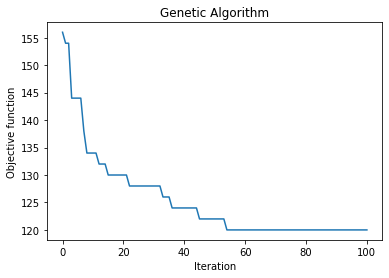

In [57]:
from geneticalgorithm import geneticalgorithm as ga

varbound=np.array([[-4,4]]*len(schedule_dic))
vartype=np.array([['int']]*len(schedule_dic))
algorithm_param = {'max_num_iteration': 100,\
                   'population_size':30,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

ga_model = ga(function=obj_func, dimension=len(schedule_dic), variable_type_mixed=vartype,
            variable_boundaries=varbound, algorithm_parameters=algorithm_param, function_timeout = 60.0)

ga_model.run()

In [50]:
solution1 = ga_model.output_dict
solution1

{'variable': array([ 4.,  1.,  1., -1., -4.,  4.,  3.,  2., -1., -4., -4.,  0., -2.,
        -2.,  3.,  3.,  4.,  4.,  4.,  4.,  2., -4., -3.,  4.]),
 'function': 122.0}

In [51]:
convergence1 = ga_model.report


In [52]:
new_dic = shift_schedule(schedule_dic = schedule_dic, floatings = solution1["variable"])

In [53]:
new_df = pd.DataFrame.from_dict(new_dic, orient = 'index')

In [54]:
new_df.to_excel("SUNDAY.xlsx")

In [55]:
df_sol = pd.DataFrame(solution1["variable"])
df_sol.to_excel("SUNDAY-sol.xlsx")